## I. *Introduction*

The COVID-19 outbreak has affected and continues to affect populations all across the world. Lives have been lost, families are suffering, and the world is drastically changing. Not only are we facing a health crisis, but we are also in the midst of a human, economic, and social crisis. The context of this work focuses on the economic aspect, specifically the current job market. Many of those already in the workforce have lost their jobs, and a handful of students have had their internships/full-time offers rescinded. As a result, my work aggregates together multiple data sources of various companies' characteristics to look for insights. I am primarily focused on discovering whether there are specific or common characteristics of companies that those in their job search should be aware of. Through my analysis, the main findings that I discovered give more insight into the location and type of job function companies are actively hiring for, as well as internship availability for those still seeking summer opportunities. These findings are meant to spread awareness of the current job market in efforts of assisting those in their job search during COVID-19.



## II. *Data description*

### Dataset
   - Link: https://github.com/jmo0428/Hiring-Insights/blob/master/final_dataset.csv

### Motivation

- ***Why was this dataset created***?

The motivation behind creating this dataset is to look more deeply into a subset of companies that are still currently hiring during this unusual time as a result of COVID-19. Specifically, I would like to see if there are any insights or relationships that could be made with regards to the characteristics of companies actively hiring. In other words, is there something specific that those in their job search currently should be looking for, or on the other hand should stay away from?

- ***Who funded the creation of the dataset?***

The funding of this dataset is attributed to three different sources that I used to aggregate into one dataset. These three sources include:

1. Blind, an anonymous community application for the workplace, whose mission is to break down professional barriers and hierarchy. The dataset I downloaded from Blind aims to support those seeking new opportunities due to COVID-19. The link to their dataset can be found here: https://www.teamblind.com/whoshiring

2. A github repository, "hiring2020" made by the user "gcreddy42", which lists the status of companies' internships. Similar to Blind, recruiters and company representatives are encouraged to pass on information regarding roles in their companies to the owner of this repository, which can be found here: https://github.com/gcreddy42/hiring2020
    
3. A kaggle dataset containing information about 7+ million companies, which is owned and maintained by "People Data Labs", which can be found here: https://www.kaggle.com/peopledatalabssf/free-7-million-company-dataset
    
To summarize, the creation of my dataset comes from aggregating these three sources together. I would also like to acknowledge those that have taken the effort to add their valuable insights and information regarding hiring activity within their companies.

### Composition

- ***What are the observations (rows) and the attributes (columns)?***

The **observations (rows)** represent different companies. The **attributes (columns)** describe aspects of the company, such as, location, job functions they're hiring for, date of the job submission, whether they're hiring interns, founding date (year), company size range, and current employee estimate within the company.

- ***What processes might have influenced what data was observed and recorded and what was not?***

Because a fair amount of the data collected was taken from anonymous open communities, there is a possibility that the data is not entirely accurate. Looking at Blind specifically, the submissions of company opportunities are not actually verified for accuracy, instead, only inappropriate content is moderated. As a result, this process may lead to inaccurate information being spread, but at the same time hopefully minimize harmful content.

### Preprocessing/Cleaning/Labeling

- ***What preprocessing was done, and how did the data come to be in the form that you are using?*** 

To preprocess my data, I separated it into five different steps:

1. **First Step:** First, I began with the TeamBlind dataset (loaded in as csv file) and took out columns that I did not plan to use, i.e. "Where to Apply", "Find on Blind", "Notes". Next, I sorted the DataFrame alphabetically using "Company Name", and then removed rows that contained duplicates of company names. 

2. **Second Step:** Next, I navigated to the URL: https://github.com/gcreddy42/hiring2020, copied the data under the two tables "Actively Hiring List" & "COVID-19 Summer 2020 Internship Status List", and pasted that data into a csv file. For the table under "Actively Hiring List", I removed the columns *Country* and *Position*, removed all rows without the Job Type of "Internship" (solely focused on looking at available internship opportunities), and removed all rows with duplicate company names. I then proceeded to create a new column Internships in the newly created csv file and populated the column with respect to availability, i.e. if the company is still hiring interns (has a checkmark in the row), then set the cell to True, otherwise False (has an "X" in the row. Using this csv file, I aggregated it with the TeamBlind dataset to create a new column "Hiring Interns". If a company was found in both csv files, and if the company is still hiring interns, i.e. if True then fill in "Yes" for that company. If a company is in both csv files, but is not hiring interns anymore, i.e. if False, or if a company isn't found in both datasets, then fill in "No" for that company.

3. **Third Step:** For the third step, I looked at another dataset, which was a downloaded csv file from Kaggle that contains data about more than 7 million different companies. Through matching companies found in both the downloaded kaggle csv file and the TeamBlind dataset, I added the new columns: "Year founded", "Size range", and "Current Employee Estimate" to the TeamBlind dataset. Similar to the "Hiring Interns" column, if a company is in both csv files, then fill in the respective value for that company. If there is no match, then set the value to "Unknown" as information for that company under the column is unavailable. As a result, because there were many "Unknown" values in the dataset, I decided to remove all rows that contained "Unknown" to help make the data look cleaner.

4. **Step Four:** Export the TeamBlind DataFrame to a csv file named "final_dataset.csv". Set the index equal to False so it is exported without the index.

5. **Step Five:** Because there were several founding dates missing for some companies, i.e. "Unknown", I decided to manually input the founding year for those companies through looking up each one. I manipulated this data directly in the csv file. Moreover, the format of values in the "Location" column seemed to differ a lot, so I wanted to make them all follow the same format. Specifically, only include the state name in which the company is located. For companies that have multiple locations, include all states, and for companies that are remote just denote the value as "Remote". This data was also manipulated directly in the csv file. Furthermore, if a company had multiple locations and some were out of state, I filtered them out.

### Collection Process

- **If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

N/A, other people were not aware of the data collection.

### Origin of raw data sources

- **Where can your raw source data be found, if application? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box)**

    - TeamBlind data: https://cornell.box.com/s/a9liknlnbbf0ai2xwwl2kkb6komyc2ke
    - github data: https://cornell.box.com/s/24992hou4fhij4wtpsqlztxzl86jo082
    - kaggle data: https://cornell.box.com/s/zbz4ofewxo296yxgoj4cy4s4emmfzyko

## III. *Data analysis*

In [796]:
# import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

**a) Load in the dataset "final_dataset.csv" and print the first five columns to see if it successfully loaded**

In [797]:
hiring_dataset = pd.read_csv("final_dataset.csv")
hiring_dataset.head()

,Company,Location,Job Function,Date of Submission,Hiring Interns,Year Founded,Size Range,Current Employee Estimate
0,1010Data,"New York, Virginia, Tennessee, Georgia, Califo...","Business/Strategy,Software Engineer,Sales,Cust...",4/10/20 0:27,No,2000,201 - 500,171
1,1Password,US,Software Engineer,4/10/20 0:25,Yes,2005,11 - 50,23
2,3Degrees,California,Legal,4/8/20 3:32,No,2007,1 - 10,1
3,Accenture,California,Consulting,4/8/20 0:57,Yes,1989,10001+,190689
4,Accuro Group,California,Operation,4/17/20 18:51,No,2003,11 - 50,20


**b) Since I don't know much about my dataset yet, I will use summary functions along with visual displays to describe different parts of my data. This will hopefully give me a better sense of what further insights I would like to dive deeper into later on. I will also include a brief analysis of each part of the dataset I observe to sum up my findings and stay organized. After describing different parts of my data, I will summarize my findings and then attempt to show patterns or relationships between variables.**

##### 1. Location column
The code below extracts all the data from the *Location* column to look for insights. Specifically, I'll be looking into the top locations that are still hiring, and analyzing them through various calculations and plots.

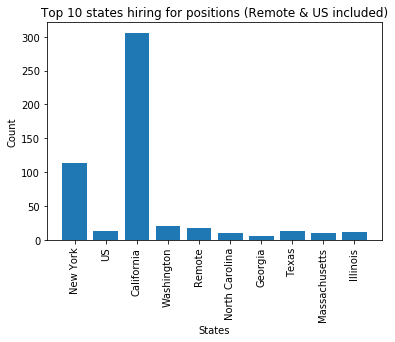

49% of companies are hiring from California in my dataset
20% of companies are hiring from New York in my dataset
4% of companies are hiring from Washington in my dataset
3% of companies are hiring from Remote in my dataset
3% of companies are hiring from Texas in my dataset
2% of companies are hiring from Massachusetts in my dataset
2% of companies are hiring from Illinois in my dataset
2% of companies are hiring from US in my dataset
1% of companies are hiring from Georgia in my dataset
1% of companies are hiring from North Carolina in my dataset


In [801]:
# Location column
location = hiring_dataset["Location"]

# Returns a dictionary of all unique locations mapped to the total number 
# of times it is seen in the dataset
def state_to_count(loc):
    state_dict = {}
    for row in loc:
        state_arr = row.split(',')
        if len(state_arr) == 1:
            curr_state = state_arr[0].strip()
            if curr_state not in state_dict:
                state_dict[curr_state] = 1
            else:
                state_dict[curr_state] += 1
        else:
            for state in state_arr:
                curr_state = state.strip()
                if curr_state not in state_dict:
                    state_dict[curr_state] = 1
                else:
                    state_dict[curr_state] += 1
    return state_dict

# Stores the dictionary returned from state_to_count() in "location_dict"
location_dict = state_to_count(location)
# Sorts location_dict in descending order based off the values
location_dict = sorted(location_dict.items(), 
                            key = lambda x : x[1], reverse=True)

# Retrieves the top 10 locations for hiring
top_ten_locations = np.array(location_dict[:10])
ten_locations = top_ten_locations[:, 0]
location_values = top_ten_locations[:, 1].astype(int)

# Stores each occurence of a location inside "locations". 
# This array will later help us plot a histogram displaying the top locations
locations = []
for row in location:
    curr_row = row.split(',')
    for l in curr_row:
        if l in ten_locations:
            locations.append(l)

# Plots a histogram displaying the top 10 seen locations in our dataset
# This is equivalent to saying that these locations also have the greatest amount of job opportunities
bins = np.linspace(0, 10, num=11)
plt.hist(locations, bins=bins, align="left", rwidth=0.8)
plt.title("Top 10 states hiring for positions (Remote & US included)")
plt.xlabel("States")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.show()

# Loops through a dictionary that maps the top 10 locations to their respective count
# Calculates and prints the percentage of companies hiring from that specific area
for key, value in top_ten_locations:
    percentage = int(int(value) / len(hiring_dataset) * 100)
    print("{}% of companies are hiring from {} in my dataset"
         .format(percentage, key))

**Analysis:** Based off our analysis of data from the *Location* column, we are able to visualize and calculate which states have more job opportunities from our dataset. We see that California and New York are the most popular locations for hiring, with about 49% and 20% of companies hiring from California and New York respectively. Although not a state, "Remote" opportunities are also available, which makes sense during this unusual time. It's also important to note that the value of "US" was commonly seen in the dataset, which is kind of a gray area as those companies didn't specify which state in the US they're hiring for.

##### 2. Job Function

The code below extracts all the data from the *Job Function* column to look for insights. I'll be looking into the different types of job functions available for hire and determining whether a specific role is more desired during this time. Similar to the extraction of data from the *Location* column, I plan to map specific job functions to the total number of times it is seen in the dataset.

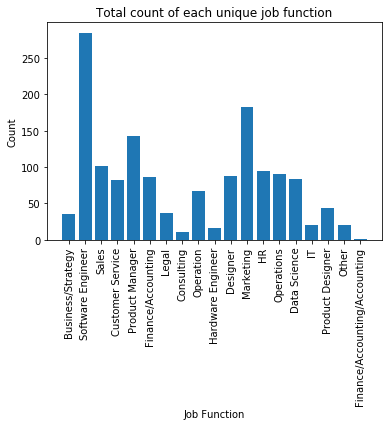

44% of companies are hiring from Software Engineer in my dataset
28% of companies are hiring from Marketing in my dataset
22% of companies are hiring from Product Manager in my dataset
15% of companies are hiring from Sales in my dataset
14% of companies are hiring from HR in my dataset
14% of companies are hiring from Operations in my dataset
13% of companies are hiring from Designer in my dataset
13% of companies are hiring from Finance/Accounting in my dataset
13% of companies are hiring from Data Science in my dataset
12% of companies are hiring from Customer Service in my dataset
10% of companies are hiring from Operation in my dataset
6% of companies are hiring from Product Designer in my dataset
5% of companies are hiring from Legal in my dataset
5% of companies are hiring from Business/Strategy in my dataset
3% of companies are hiring from IT in my dataset
3% of companies are hiring from Other in my dataset
2% of companies are hiring from Hardware Engineer in my dataset
1% of c

In [803]:
# Job Function column
job_functions = hiring_dataset["Job Function"]

# Returns a dictionary of all unique job functions mapped to the total number of times it is seen in the dataset
def job_to_count(jobs):
    job_func_dict = {}
    for row in jobs:
        job_arr = row.split(',')
        if len(job_arr) == 1:
            curr_job = job_arr[0]
            if curr_job not in job_func_dict:
                job_func_dict[curr_job] = 1
            else:
                job_func_dict[curr_job] += 1
        else:
            for job in job_arr:
                if job not in job_func_dict:
                    job_func_dict[job] = 1
                else:
                    job_func_dict[job] += 1
    
    return job_func_dict

# Stores the dictionary returned from job_to_count() in "job_dict"
job_dict = job_to_count(job_functions)

# Stores each occurence of a job function inside "jobs"
# This array will later help us plot a histogram displaying the count of each job function 
jobs = []
for row in job_functions:
    curr_row = row.split(',')
    jobs.extend(curr_row)

# Plots a histogram displaying the count of each job function
bins = np.linspace(0, 19, 20)
plt.hist(total_jobs, bins=bins, align="left", rwidth=0.8)
plt.title("Total count of each unique job function")
plt.xlabel("Job Function")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.show()

# Sorts job_dict in descending order based off the values
sorted_job_list = sorted(job_dict.items(), 
                  key = lambda x : x[1], reverse = True)

# Loops through a dictionary that maps a job function to its respective count
# Calculates and prints the percentage of companies hiring for that specific position
for job in sorted_job_list:
    job_ratio = int(int(job[1]) / len(hiring_dataset) * 100)
    print("{}% of companies are hiring from {} in my dataset"
         .format(job_ratio, job[0]))

**Analysis:** Based off our analysis of data from the *Job Function* column, we are able to visualize and calculate which positions are in higher demand as well as which are not. From our calculations, we see that the roles for Software Engineers, Marketing, and Product Managers are in high demand, while roles for Finance, Accounting, and Consulting are not too high in demand. It's important to note that companies are also hiring for multiple positions, which explains why the sum of percentages is greater than 100. We can think of each percentage as independent from one another.

##### 3. Date of Submission

I am choosing not to look for insights into this column because the date of submission for the companies in my dataset only go up to *April 23* the latest. In other words, my dataset does not dynamically update with the most recent companies hiring. Hence, I do not think it's worth it to currently analyze this piece of data.

##### 4. Hiring Interns 

The code below extracts all the data from the *Hiring Interns* column to look for insights. I'll be calculating the proportion of companies that are actively hiring interns to gauge the amount of opportunities for internships during COVID-19. It's important to note that this is only a subset of companies, and that the result is not indicative of all internship opportunities.

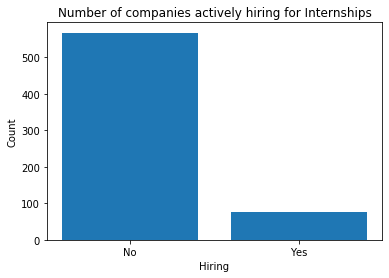

Only 75 out of 642 companies are actively hiring for interns


In [805]:
# Hirng Interns column
hiring_interns = hiring_dataset["Hiring Interns"]

# Calculates the number of companies that are and aren't actively hiring for interns
yes_hiring = hiring_interns[ hiring_interns == "Yes" ]
no_hiring = hiring_interns[ hiring_interns == "No" ]

# Plots a histogram displaying the total number of companies that are and aren't actively hiring for interns
bins = np.linspace(0, 2, num=3)
plt.hist(hiring_interns, bins=bins, align="left", rwidth=0.8)
plt.title("Number of companies actively hiring for Internships")
plt.xlabel("Hiring")
plt.ylabel("Count")
plt.show()

# Prints the numerical value of companies with internship opportunities
print("Only {} out of {} companies are actively hiring for interns"
      .format(len(yes_hiring), len(hiring_interns)))

**Analysis:** Based off the histogram and calculation printed, it seems that most companies in my dataset are not actively hiring for interns. Only a little over 10% (75/642) of companies still have available internship opportunities.

##### 5. Year Founded

The code below extracts all the data from the *Year Founded* column to look for insights. I'll be plotting and counting the range of years found in my dataset to see if there is any relationship to be made. In other words, is there a specific year or range of years that may indicate whether a company is more likely to be hiring during this time?

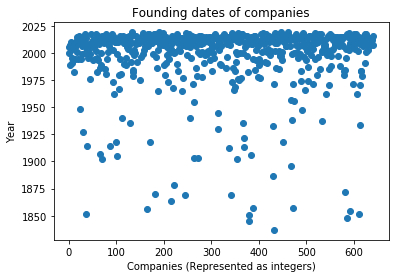

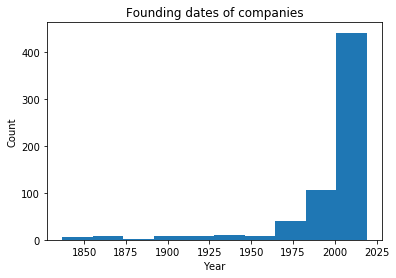

The mean founding year of all companies is: 1997


The standard deviation of year founded is: 31.2


The median founding year of all companies is: 2008


The number of companies founded between 1825 and 1850 is: 3
The number of companies founded between 1850 and 1875 is: 12
The number of companies founded between 1875 and 1900 is: 3
The number of companies founded between 1900 and 1925 is: 15
The number of companies founded between 1925 and 1950 is: 13
The number of companies founded between 1950 and 1975 is: 25
The number of companies founded between 1975 and 2000 is: 118
The number of companies founded between 2000 and 2025 is: 453


In [806]:
# Year Founded column
year_founded = hiring_dataset["Year Founded"]

# x represents each company as a number instead of its respective name
x = range(0, len(year_founded))
# Scatter plot displaying the founding year of each company
plt.scatter(x, year_founded)
plt.title("Founding dates of companies")
plt.xlabel("Companies (Represented as integers)")
plt.ylabel("Year")
plt.show()

# Plots a histogram displaying the founding year of each company
plt.hist(year_founded)
plt.title("Founding dates of companies")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Finds and prints mean founding year of all companies
founding_mean = int(year_founded.mean())
print("The mean founding year of all companies is: {}"
     .format(founding_mean))
print("\n")
# Finds and prints the standard deviation of founding years of all companies
founding_std = round(year_founded.std(), 2)
print("The standard deviation of year founded is: {}"
     .format(founding_std))
print("\n")
# Finds and prints the median founding year of all companies
founding_median = int(year_founded.median())
print("The median founding year of all companies is: {}"
     .format(founding_median))
print("\n")

# Finds the number of companies founded in each range (25 year ranges)
min_year = year_founded.min()
max_year = year_founded.max()
year_ranges = [1825, 1850, 1875, 1900, 1925, 1950, 1975, 2000, 2025]
total = 0
for ind in range(1, len(year_ranges)):
    num_companies = len(year_founded[ (year_founded >= year_ranges[ind-1] ) & 
                                  (year_founded < year_ranges[ind])])
    print("The number of companies founded between {} and {} is: {}"
         .format(year_ranges[ind-1], year_ranges[ind], num_companies))

**Analysis:** Based off the above scatter plot and histogram, it seems that the majority of companies hiring during this time are relatively newer companies, i.e. they were recently established. When calculating the mean founding year of all companies, we see that the number deviates a bit from the more common founding years. This is attributed to the companies that were founded in the 1800s as well as early-mid 1900s, which explains why the mean founding year is pulled down. Furthermore, a standard deviation of approximately 31 indicates that there is a fair amount of variability within this column of data. In short, the standard deviation we calculated is high, which means that the data is more spread out. To obtain a more accurate interpretation of the data, I resorted to calculating the median, which normalizes the data in that the more extreme data points do not have as much power to influence. Lastly, we see the number of companies founded in different year ranges (25 years apart). These calculations show that the majority of companies founded were somewhere between 2000 and 2025, which again, are relatively recent founding dates.

##### 6. Size Range

The code below extracts all the data from the *Size Range* column to look for insights. I'll be plotting and counting the different size ranges found in my dataset to see if there are any relationships to be made. In other words, is there a specific size range of a company that may indicate whether a company is more likely to be hiring during this time?

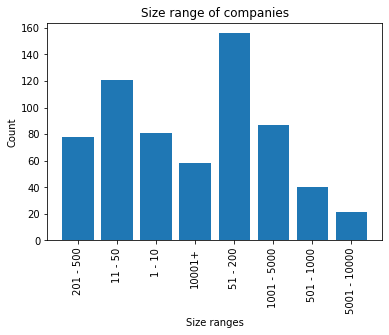

The number of companies within the size range 1 - 10 is: 81
The number of companies within the size range 11 - 50 is: 121
The number of companies within the size range 51 - 200 is: 156
The number of companies within the size range 201 - 500 is: 78
The number of companies within the size range 501 - 1000 is: 40
The number of companies within the size range 1001 - 5000 is: 87
The number of companies within the size range 5001 - 10000 is: 21
The number of companies within the size range 10001+ is: 58


In [810]:
# Size Range column
size_range = hiring_dataset["Size Range"]

# Creates a dictionary mapping each unique size to the number of times it is seen in the dataset
range_dict = {}
for size in size_range:
    if size not in range_dict:
        range_dict[size] = 1
    else:
        range_dict[size] += 1
        
# Decompresses the dictionary into an array
size_range_arr = []
ranges = ['1 - 10', '11 - 50', '51 - 200', '201 - 500', '501 - 1000',
          '1001 - 5000', '5001 - 10000', '10001+']
for r in ranges:
    r_count = [r] * range_dict[r]
    size_range_arr.extend(r_count)

# Plots a histogram displaying the count for size ranges of companies
bins = np.linspace(0, 8, 9)
plt.hist(size_range, bins=bins, align="left", rwidth=0.8)
plt.title("Size range of companies")
plt.xlabel("Size ranges")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.show()

# Prints the number of companies in each respective size range
for r in ranges:
    print("The number of companies within the size range {} is: {}"
         .format(r, range_dict[r]))

**Analysis:** Based off the above histogram and calculations, the size ranges of "11 - 50" (121 companies) and "51 - 200" (156 companies) seem to be the most commonly seen ranges. In fact, the size ranges that constitute a smaller-medium sized company make up the majority of the dataset.

##### 7. Current Employee Estimate

The code below extracts all the data from the *Current Employee Estimate* column to look for insights. I'll be plotting and counting the different employee estimates found in my dataset to see if there are any relationships to be made. In other words, is there a specific employee estimate of a company that may indicate whether a company is more likely to be hiring during this time?

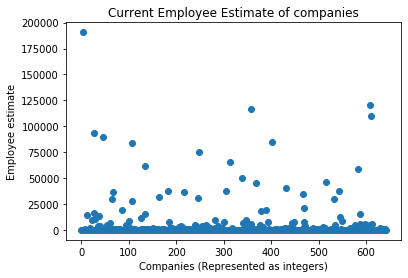

The mean employee estimate is: 3486
The standard deviation of current employee estimates is: 14905
The median of current employee estimates is: 66


In [811]:
# Current Employee Estimate column
employee_estimate = hiring_dataset["Current Employee Estimate"]

# x represents each company as a number instead of its respective name
x = range(0, len(employee_estimate))
# Scatter plot displaying the current employee estimate of each company
plt.scatter(x, employee_estimate)
plt.title("Current Employee Estimate of companies")
plt.xlabel("Companies (Represented as integers)")
plt.ylabel("Employee estimate")
plt.show()

# Finds and prints mean founding year of all companies
employee_mean = int(employee_estimate.mean())
print("The mean employee estimate is: {}"
     .format(employee_mean))
# Finds and prints the standard deviation of current employee estimates of all companies
employee_std = int(employee_estimate.std())
print("The standard deviation of current employee estimates is: {}"
     .format(employee_std))
# Finds and prints the median of current employee estimates of all companies
employee_median = int(employee_estimate.median())
print("The median of current employee estimates is: {}"
     .format(employee_median))

**Analysis:** Based off the above scatter plot, we see that most of the data points are bunched together at the bottom. This means that the majority of companies in the dataset seem to have relatively lesser employees. Similar to the analysis of company size ranges, smaller-medium sized companies contain smaller-medium number of employees, which represents the nature of companies currently hiring. When calculating the mean of current employee estimates, we see that the number is relatively high. This is due to the large companies in the dataset that contain a great amount of employees, causing the mean to be pulled up. Moreover, a standard deviation of approximately 14905 indicates that there is a fair amount of variability within this column of data. In short, the standard deviation we calculated is high, which indicates that the data is more spread out. To obtain a more accurate interpretation of the data, I resorted to calculating the median (66), which normalizes the data in that the more extreme data points do not have as munch power to influence our results.

#### Summary of analyzing dataset columns

After describing different parts of my data, below is a summary of some of the insights I found:
- ***Location***
    - California & NY are the top locations for hiring, with about 49% and 20% of companies hiring from California and New York respectively. This may be due in part to the major cities located in each state.
- ***Job Function***
    - The roles for Software Engineers, Marketing, and Product Managers are in high demand, while roles for Finance, Accounting, and Consulting are not so high in demand. An explanation for this could be that more tech-related roles, i.e. Software Engineering, are able to carry out their responsibilities remotely. However, due to COVID-19, responsibilities for roles such as Finance and Consulting (which require client interaction & traveling for Consulting) are not as feasible due to limited in-person interaction.
- ***Hiring Interns***
    - Most companies in my dataset are not actively hiring for interns during this time. Only a little over 10% (75/642) of companies still have available internship opportunities (as of 4/23/2020). This number doesn't seem too unusual as regardless of COVID-19, most internship positions are typically filled around this time. Additionally, companies may also not have the necessary resources during this time to hire more interns.
- ***Year Founded***
    - The majority of companies hiring during this time are relatively newer companies, i.e. they were recently established (after 2000). To support this claim, the median founding year of all companies was found to be 2008. Additionally, 453/642 companies were founded between 2000 - 2025, which accounts for approximately 70% of the dataset. An explanation for this could be that these companies are not fully established yet, i.e. they need to fill in positions or hire more employees to further help the company grow.
- ***Size Range***
    -  The company size ranges of "11 - 50" and "51 - 200" seem to be the most commonly seen ranges, with 121/642 (19%) and 156/642 (24%) companies in the size ranges respectively. In fact, the size ranges that constitute a smaller-medium sized company (< 500 employees) make up the majority of the dataset. 
- ***Current Employee Estimate***
    - The majority of companies in the dataset seem to have relatively lesser employees. Similar to the analysis of company size ranges, smaller-medium sized companies contain smaller-medium number of employees, which represents the nature of companies currently hiring.

**c) Now that we've described different parts of the data and summarized the findings, I will now attempt to show patterns or relationships between variables to my address my research question.** 

1. The first relationship that I'd like to further explore is between *Location* and *Job Function*. In my analysis of the data above, I found that there were certain locations (states) and certain job functions that were more prevalent in my dataset. Hence, I would like to see if a relationship could be established between the two variables, i.e. does a specific location contain more opportunities for a specific role? This helps address my research question by potentially narrowing down the criteria for companies actively hiring during COVID-19.

**Approach**: I will accomplish this by using the top ten most common locations found in my dataset earlier. Using these ten locations, I will find which job function is the most popular in each respective area. This will narrow down my search and ultimately allow me to make a conclusion of any insights I find.

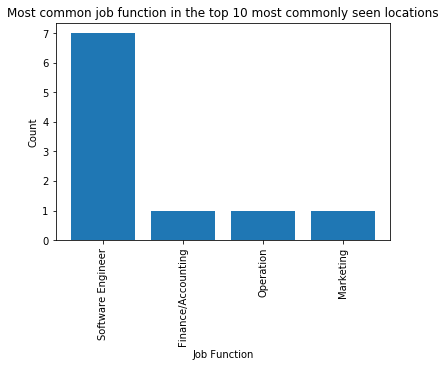

The most common job function companies are hiring for in California is: Software Engineer


The most common job function companies are hiring for in New York is: Software Engineer


The most common job function companies are hiring for in Washington is: Software Engineer


The most common job function companies are hiring for in Remote is: Software Engineer


The most common job function companies are hiring for in Texas is: Software Engineer


The most common job function companies are hiring for in Massachusetts is: Software Engineer


The most common job function companies are hiring for in Illinois is: Software Engineer


The most common job function companies are hiring for in US is: Finance/Accounting


The most common job function companies are hiring for in Georgia is: Operation


The most common job function companies are hiring for in North Carolina is: Marketing




In [813]:
# For each location, find the most common job function
location_to_job = {}

for loc in ten_locations:
    # Subsets the main DataFrame to create a new one containing only data from the current location being looked at
    curr_location = hiring_dataset[ hiring_dataset["Location"].isin([loc])]
    jobs = curr_location["Job Function"]
    
    # Dictionary that temporarily maps unique job functions to the total number of times it is seen in 
    # that respective location
    tmp_dict = job_to_count(jobs)
    # Sorts job_dict in descending order based off the values
    tmp_dict = sorted(tmp_dict.items(), key = lambda x : x[1], reverse=True)
    # Retrievest most prevalent job function in the current location being looked at
    top_job = tmp_dict[0][0]
    location_to_job[loc] = top_job

# Plots a histogram of the most common job function in the top 10 most commonly seen locations
bins = np.linspace(0, 4, 5)
plt.hist(location_to_job.values(), bins=bins, align="left", rwidth=0.8)
plt.title("Most common job function in the top 10 most commonly seen locations")
plt.xlabel("Job Function")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.show()

# Prints each top location along with the most common job function in that location
for key, value in location_to_job.items():
    print("The most common job function companies are hiring for in {} is: {}"
         .format(key, value))
    print("\n")
    

**Analysis:** From the above histogram, it is clear that the job function of "Software Engineer" is the most desired role based on the top ten most commonly seen locations in my dataset, as it accounts for 70% (7/10) of the data in the plot. Additionally, approximately 93% (597/642) of my dataset involves at least one of the top ten locations. Hence, I believe it is safe to assume that when paired with or without location, the role of "Software Engineer" is currently the most desired position during COVID-19.

2. The second relationship that I'd like to further explore is between *Location* and *Hiring Interns*. The motivation behind this is to analyze whether there is a specific location(s) where companies are more likely to have internship opportunities. This helps address my research question by potentially discovering the most popular locations for internship opportunities during COVID-19.

**Approach:** To accomplish this, I will piece together information in both columns to arrive at a conclusion. Specifically, I'll be iterating through the entire DataFrame and checking if the current location being looked at is hiring interns, i.e if the value is "Yes". 

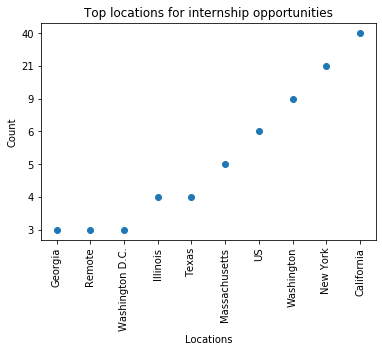

In [814]:
location_to_interns = {}
# Loops through every row in main DataFrame to check if location(s) is hiring interns
for ind in hiring_dataset.index:
    curr_row = hiring_dataset.loc[ind]
    tmp_locations = curr_row["Location"].split(',')
    if curr_row["Hiring Interns"] == "Yes":
        for loc in tmp_locations:
            loc = loc.strip()
            if loc not in location_to_interns:
                location_to_interns[loc] = 1
            else:
                location_to_interns[loc] += 1
    
# Sorts location_to_interns in descending order based off the values
location_to_interns = sorted(location_to_interns.items(), key = lambda x : x[1], reverse=True)

top_ten = np.array(location_to_interns[:10])[::-1]
ten_locations = top_ten[:, 0]
location_counts = top_ten[:, 1]

# Scatter plot that displays the counts of internship opportunities in each respective location
plt.scatter(ten_locations, location_counts)
plt.title("Top locations for internship opportunities")
plt.xlabel("Locations")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.show()

**Analysis:** From the above scatter plot, we see that there are indeed locations where internship opportunities are more prevalent. The main locations for internship hires seem to be Washington (9), New York (21), and California (40). This information is useful as those still looking for internship opportunities should consider focusing their efforts towards these locations if possible.

### IV. *Evaluation of significance*

To compare the patterns previously observed, I will combine the techniques of simulation and randomization to validate my findings. From a high level, I'll be running trials and for each trial, randomly choosing a row in my dataset to look for the patterns previously observed. Through this simulation and randomization, I will accumulate a counter that will calculate the percentage of observations that match my desired patterns.

In [817]:
job_counter = 0
location_internship_counter = 0
desired_locations = ["Washington", "New York", "California"]

for trial in range(1000):
    rand_int = np.random.randint(0, 642)
    random_row = hiring_dataset.iloc[rand_int]
    if "Software Engineer" in random_row["Job Function"]:
        job_counter += 1
    for loc in desired_locations:
        if loc in random_row["Location"] and random_row["Hiring Interns"] == "Yes":
            location_internship_counter += 1

job_counter = round((job_counter / 1000) * 100, 2)
location_internship_counter = round((location_internship_counter / 1000) * 100, 2)

print("After running 1000 random trials, approximately {}% of companies are recruiting for Software Engineers"
     .format(job_counter))
print("After running 1000 random trials, approximately {}% of companies are actively hiring for interns"
     .format(location_internship_counter))

After running 1000 random trials, approximately 43.9% of companies are recruiting for Software Engineers
After running 1000 random trials, approximately 11.6% of companies are actively hiring for interns


**The results after running my simulation and randomization code are consistent with the findings I found previously. In my data analysis, I found that approximately 44% of companies are hiring for Software Engineers and a little over 10% of companies are actively hiring for interns.**

### V. *Conclusion*

Over the course of my data analysis, I found several key insights regarding my dataset. The key points that I found and validated were that according to my dataset, the most desired role during COVID-19 is Software Engineers, with about 44% of companies hiring for this position. Moreover, when analyzing only the top ten most commonly seen locations in my dataset, Software Engineers are the most sought role in 70% (7/10) of those locations. Additionally, when analyzing internship availability, a little over 10% of companies are actively hiring for interns; Washington, New York, and California are the top three locations for number of internship opportunities in ascending order. I am fairly confident in these insights as I arrived at them through both analyzing the dataset initially as well as combining the techniques of simulation and randomization. Interpreting these results in the wider real-life application context, I believe the findings are fairly accurate. Because COVID-19 has caused many companies and employees to adopt a WFH (work from home) policy, it is reasonable that Software Engineers are still highly desired, as the role itself is flexible in terms of where responsibilities can be carried out. As for internship availability, I am not too surprised that the percentage of companies (~11%) still actively hiring for interns is relatively low. This is because summer is right around the corner, which means that most internship positions are already filled, or companies do not have the necessary resources during this sensitive time to hire interns. Ultimately, the insights I found through analyzing my data are meant further assist those still in their job search, and I hope that the insights I discovered are able to spread more awareness regarding the characteristics of companies still actively hiring.

### VI. *Source code*

 - Github repository: https://github.com/jmo0428/Hiring-Insights
 - **Note**: *data-retrieval.ipynb* contains all the code for data filtering and aggregation to create my final dataset


### VII. *Acknowledgements*

*Data Sources used to aggregate data:*

- https://www.teamblind.com/whoshiring
- https://github.com/gcreddy42/hiring2020
- https://www.kaggle.com/peopledatalabssf/free-7-million-company-dataset

*Other resources that I found helpful:*

- https://arxiv.org/pdf/1803.09010.pdf : Inspiration taken to format the "data description" section
- Inspiration taken from Professor Mimno's notes from 03/03 using the avocados example. I used the notes to help piece together information for finding relationships between variables.
